In [1]:
import pandas as pd
import numpy as np

import re
import string

import spacy

import gensim
from gensim import corpora

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns


Method to find optimal number of topics Code from:https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python

In [2]:
df =  pd.read_csv("Reviews.csv")

In [3]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [4]:
len(df['ProductId'].unique())

74258

In [5]:
len(df['UserId'].unique())

256059

In [6]:
df['Text'][0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [7]:
corpus = []
for i in range(0, len(df)):
    review = df['Text'][i]
    review = review.lower()
    
    corpus.append(review)

In [8]:
corpus[0].split()

['i',
 'have',
 'bought',
 'several',
 'of',
 'the',
 'vitality',
 'canned',
 'dog',
 'food',
 'products',
 'and',
 'have',
 'found',
 'them',
 'all',
 'to',
 'be',
 'of',
 'good',
 'quality.',
 'the',
 'product',
 'looks',
 'more',
 'like',
 'a',
 'stew',
 'than',
 'a',
 'processed',
 'meat',
 'and',
 'it',
 'smells',
 'better.',
 'my',
 'labrador',
 'is',
 'finicky',
 'and',
 'she',
 'appreciates',
 'this',
 'product',
 'better',
 'than',
 'most.']

In [9]:
len(corpus[0].split())

48

In [10]:
corpa = []
for i in range(0,len(corpus)):
    text = corpus[i]
    if len(text.split()) >20 and len(text.split())<100:
        corpa.append(text)

In [11]:
corpa[0]

'i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than  most.'

In [12]:
len(corpa)

404018

To reduce time we will take first 1000 values.

In [13]:
corpa1 =corpa[0:1000]

In [14]:
corpa1

['i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than  most.',
 'product arrived labeled as jumbo salted peanuts...the peanuts were actually small sized unsalted. not sure if this was an error or if the vendor intended to represent the product as "jumbo".',
 'this is a confection that has been around a few centuries.  it is a light, pillowy citrus gelatin with nuts - in this case filberts. and it is cut into tiny squares and then liberally coated with powdered sugar.  and it is a tiny mouthful of heaven.  not too chewy, and very flavorful.  i highly recommend this yummy treat.  if you are familiar with the story of c.s. lewis\' "the lion, the witch, and the wardrobe" - this is the treat that seduces edmund into selling out his brother and sisters to the witch.',
 'if you are looking f

In [15]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()
corpa2 = []
for i in range(0, len(corpa1)):
    review = re.sub('[^a-zA-Z]', ' ', corpa1[i])
    review = review.lower()
    review = review.split()
    
    review = [wl.lemmatize(word) for word in review if not word in stopwords.words('english')]
    
    corpa2.append(review)

In [16]:
corpa2[1]

['product',
 'arrived',
 'labeled',
 'jumbo',
 'salted',
 'peanut',
 'peanut',
 'actually',
 'small',
 'sized',
 'unsalted',
 'sure',
 'error',
 'vendor',
 'intended',
 'represent',
 'product',
 'jumbo']

In [17]:
dictionary = corpora.Dictionary(corpa2)
doc_term_matrix = [dictionary.doc2bow(i) for i in corpa2]

In [18]:
doc_term_matrix

[[(0, 1),
  (1, 2),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 3),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1)],
 [(14, 2),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 2),
  (25, 1),
  (26, 2),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1)],
 [(34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 2),
  (67, 2),
  (68, 1),
  (69, 2),
  (70, 1)],
 [(7, 1),
  (8, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1)],
 [(70, 1),
  (87, 

In [19]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [20]:
lda_model.print_topics()

[(0,
  '0.027*"tea" + 0.019*"br" + 0.017*"coffee" + 0.012*"product" + 0.011*"good" + 0.010*"love" + 0.010*"like" + 0.009*"taste" + 0.008*"bag" + 0.007*"great"'),
 (1,
  '0.018*"good" + 0.017*"br" + 0.016*"great" + 0.013*"taste" + 0.012*"flavor" + 0.012*"best" + 0.011*"product" + 0.009*"one" + 0.008*"like" + 0.008*"bar"'),
 (2,
  '0.017*"store" + 0.016*"great" + 0.014*"product" + 0.014*"find" + 0.014*"amazon" + 0.010*"good" + 0.009*"taste" + 0.008*"price" + 0.008*"grocery" + 0.007*"make"'),
 (3,
  '0.073*"br" + 0.012*"flavor" + 0.010*"taste" + 0.008*"good" + 0.008*"really" + 0.007*"used" + 0.007*"tried" + 0.007*"like" + 0.006*"great" + 0.006*"best"'),
 (4,
  '0.011*"food" + 0.007*"good" + 0.007*"mint" + 0.006*"money" + 0.005*"chocolate" + 0.005*"would" + 0.005*"buy" + 0.005*"dog" + 0.004*"problem" + 0.004*"one"'),
 (5,
  '0.020*"like" + 0.018*"br" + 0.012*"love" + 0.010*"use" + 0.010*"flavor" + 0.010*"great" + 0.009*"product" + 0.009*"one" + 0.009*"tea" + 0.008*"good"'),
 (6,
  '0.012*"

In [21]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  
# a measure of how good the model is. lower the better.


Perplexity:  -6.961898541317221


In [22]:
# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=corpa2, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.28642489452192665


In [23]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [24]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, 
                                                        texts=corpa2, start=2, limit=20, step=1)


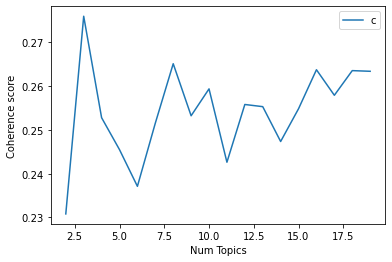

In [25]:
# Show graph
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [26]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2308
Num Topics = 3  has Coherence Value of 0.276
Num Topics = 4  has Coherence Value of 0.2528
Num Topics = 5  has Coherence Value of 0.2455
Num Topics = 6  has Coherence Value of 0.2371
Num Topics = 7  has Coherence Value of 0.2515
Num Topics = 8  has Coherence Value of 0.2651
Num Topics = 9  has Coherence Value of 0.2532
Num Topics = 10  has Coherence Value of 0.2594
Num Topics = 11  has Coherence Value of 0.2426
Num Topics = 12  has Coherence Value of 0.2558
Num Topics = 13  has Coherence Value of 0.2553
Num Topics = 14  has Coherence Value of 0.2473
Num Topics = 15  has Coherence Value of 0.2548
Num Topics = 16  has Coherence Value of 0.2637
Num Topics = 17  has Coherence Value of 0.2579
Num Topics = 18  has Coherence Value of 0.2635
Num Topics = 19  has Coherence Value of 0.2634


In [27]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.012*"br" + 0.012*"love" + 0.011*"tea" + 0.010*"great" + 0.009*"bag" + 0.008*"taste" + 0.007*"price" + 0.007*"one" + 0.007*"chip" + 0.007*"good"'),
 (1,
  '0.025*"chip" + 0.020*"br" + 0.013*"like" + 0.012*"flavor" + 0.012*"good" + 0.010*"great" + 0.010*"taste" + 0.009*"love" + 0.008*"food" + 0.007*"one"'),
 (2,
  '0.013*"like" + 0.010*"product" + 0.009*"flavor" + 0.009*"br" + 0.009*"good" + 0.009*"taste" + 0.008*"great" + 0.006*"food" + 0.006*"bag" + 0.006*"one"')]